### ЛР3 Рогозин ИУ5-61Б


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [2]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from sklearn.datasets import load_iris, load_boston
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [3]:
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, StratifiedKFold

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
# чтение обучающей выборки
data = pd.read_csv('heart.csv')

In [6]:
data = data.fillna(5)
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
# уберем непонятный для нас параметр, чтобы он не помешал в будущем
data.drop(['sex','fbs','restecg','exng','slp','caa'], axis = 1, inplace = True)

In [8]:
data

,age,cp,trtbps,chol,thalachh,oldpeak,thall,output
0,63,3,145,233,150,2.3,1,1
1,37,2,130,250,187,3.5,2,1
2,41,1,130,204,172,1.4,2,1
3,56,1,120,236,178,0.8,2,1
4,57,0,120,354,163,0.6,2,1
...,...,...,...,...,...,...,...,...
298,57,0,140,241,123,0.2,3,0
299,45,3,110,264,132,1.2,3,0
300,68,0,144,193,141,3.4,3,0
301,57,0,130,131,115,1.2,3,0


In [9]:
parts = np.split(data, [7,8], axis=1)
X = parts[0]
Y = parts[1]
print('Входные данные:\n\n', X.head(), '\n\nВыходные данные:\n\n', Y.head())

Входные данные:

     age   cp  trtbps   chol  thalachh  oldpeak  thall
0  63.0  3.0   145.0  233.0     150.0      2.3    1.0
1  37.0  2.0   130.0  250.0     187.0      3.5    2.0
2  41.0  1.0   130.0  204.0     172.0      1.4    2.0
3  56.0  1.0   120.0  236.0     178.0      0.8    2.0
4  57.0  0.0   120.0  354.0     163.0      0.6    2.0 

Выходные данные:

    output
0     1.0
1     1.0
2     1.0
3     1.0
4     1.0


## Разделение выборки

In [10]:
 X_train,  X_test,  Y_train,  Y_test = train_test_split(X,  Y, test_size=0.03)

In [11]:
print('Входные параметры обучающей выборки:\n\n',X_train.head(), \
      '\n\nВходные параметры тестовой выборки:\n\n', X_test.head(), \
      '\n\nВыходные параметры обучающей выборки:\n\n', Y_train.head(), \
      '\n\nВыходные параметры тестовой выборки:\n\n', Y_test.head())

Входные параметры обучающей выборки:

       age   cp  trtbps   chol  thalachh  oldpeak  thall
282  59.0  2.0   126.0  218.0     134.0      2.2    1.0
189  41.0  0.0   110.0  172.0     158.0      0.0    3.0
53   44.0  2.0   108.0  141.0     175.0      0.6    2.0
75   55.0  1.0   135.0  250.0     161.0      1.4    2.0
294  44.0  0.0   120.0  169.0     144.0      2.8    1.0 

Входные параметры тестовой выборки:

       age   cp  trtbps   chol  thalachh  oldpeak  thall
35   46.0  2.0   142.0  177.0     160.0      1.4    2.0
85   67.0  2.0   115.0  564.0     160.0      1.6    3.0
130  54.0  2.0   160.0  201.0     163.0      0.0    2.0
103  42.0  2.0   120.0  240.0     194.0      0.8    3.0
102  63.0  1.0   140.0  195.0     179.0      0.0    2.0 

Выходные параметры обучающей выборки:

      output
282     0.0
189     0.0
53      1.0
75      1.0
294     0.0 

Выходные параметры тестовой выборки:

      output
35      1.0
85      1.0
130     1.0
103     1.0
102     1.0


In [12]:
# Проверим правильность разделения выборки на тестовую и обучающую. Посмотрим на размеры матриц.
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(293, 7)
(10, 7)
(293, 1)
(10, 1)


# Модель ближайших соседей для произвольного гиперпараметра K

In [13]:
from sklearn.neighbors import KNeighborsRegressor

In [14]:
# Решение задачи регрессии методом 2, 5 и 10 ближайших соседей
Regressor_2NN = KNeighborsRegressor(n_neighbors = 2) 
Regressor_5NN = KNeighborsRegressor(n_neighbors = 5)
Regressor_10NN = KNeighborsRegressor(n_neighbors = 10) 
print('Пример модели:\n\n', Regressor_10NN)

Пример модели:

 KNeighborsRegressor(n_neighbors=10)


In [15]:
Regressor_2NN.fit(X_train, Y_train)
Regressor_5NN.fit(X_train, Y_train)
Regressor_10NN.fit(X_train, Y_train)
target_2NN = Regressor_2NN.predict(X_test)
target_5NN = Regressor_5NN.predict(X_test)
target_10NN = Regressor_10NN.predict(X_test)
print('Пример предсказанных значений:\n\n', target_2NN[:5], '\n ...')

Пример предсказанных значений:

 [[0.5]
 [0.5]
 [0.5]
 [0.5]
 [1. ]] 
 ...


## Оценка качества регрессии (Метрики качества)

In [16]:
 from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

In [17]:
# Оценка средней абсолютной ошибки
print('Средняя абсолютная ошибка для 2 ближайших соседей:',mean_absolute_error(Y_test,
target_2NN))
print('Средняя абсолютная ошибка для 5 ближайших соседей:',mean_absolute_error(Y_test,
target_5NN))
print('Средняя абсолютная ошибка для 10 ближайших соседей:',mean_absolute_error(Y_test,
target_10NN))

Средняя абсолютная ошибка для 2 ближайших соседей: 0.55
Средняя абсолютная ошибка для 5 ближайших соседей: 0.4600000000000001
Средняя абсолютная ошибка для 10 ближайших соседей: 0.38


In [18]:
# Оценка средней квадратичной ошибки
print('Средняя квадратичная ошибка для 2 ближайших соседей:',mean_squared_error(Y_test,
target_2NN))
print('Средняя квадратичная ошибка для 5 ближайших соседей:',mean_squared_error(Y_test,
target_5NN))
print('Средняя квадратичная ошибка для 10 ближайших соседей:',mean_squared_error(Y_test
, target_10NN))

Средняя квадратичная ошибка для 2 ближайших соседей: 0.375
Средняя квадратичная ошибка для 5 ближайших соседей: 0.276
Средняя квадратичная ошибка для 10 ближайших соседей: 0.194


In [19]:
# Оценка коэффициента детерминации

print('Коэффициент детерминации для 2 ближайших соседей:',r2_score(Y_test, target_2NN))
print('Коэффициент детерминации для 5 ближайших соседей:',r2_score(Y_test, target_5NN))
print('Коэффициент детерминации для 10 ближайших соседей:',r2_score(Y_test, target_10NN
))

Коэффициент детерминации для 2 ближайших соседей: -0.785714285714286
Коэффициент детерминации для 5 ближайших соседей: -0.3142857142857147
Коэффициент детерминации для 10 ближайших соседей: 0.07619047619047592


In [20]:
## Grid Search (решетчатый поиск)

In [21]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

## Подбор гиперпараметров

## GridSearch через среднюю квадратичную ошибку
Рассмотрим все количества ближайших соседей от 1 до 100, чтобы найти лучший результат. Возьмем 10 фолдов.

In [22]:
from sklearn.model_selection import GridSearchCV
n_range = np.array(range(1, 101, 1))
tuned_parameters = [{'n_neighbors': n_range}]
gs = GridSearchCV(KNeighborsRegressor(), tuned_parameters, cv=10, scoring='neg_mean_squared_error')
gs.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])}],
             scoring='neg_mean_squared_error')

In [23]:
print('Лучшая модель:\n\n', gs.best_estimator_)
print('\nЛучшее число ближайших соседей:\n\n',gs.best_params_) 
print('\nЛучшее значение средней квадратичной ошибки:\n\n',gs.best_score_)

Лучшая модель:

 KNeighborsRegressor(n_neighbors=47)

Лучшее число ближайших соседей:

 {'n_neighbors': 47}

Лучшее значение средней квадратичной ошибки:

 -0.21371833096579823


Изменение качества тестовой выборки в зависимости от кол-ва соседей:



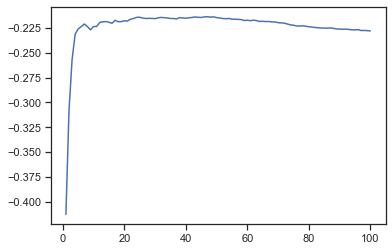

In [24]:
 print('Изменение качества тестовой выборки в зависимости от кол-ва соседей:\n') 
plt.plot(n_range, gs.cv_results_['mean_test_score'])

## GridSearch через коэффициент детерминации

Лучшая модель:

 KNeighborsRegressor(n_neighbors=47)

Лучшее число ближайших соседей:

 {'n_neighbors': 47}

Лучшее значение коэффициента детерминации:

 0.10604677014296678

Изменение качества тестовой выборки в зависимости от кол-ва соседей:



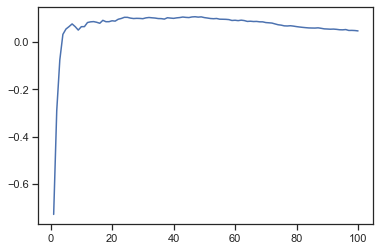

In [25]:
gs_det = GridSearchCV(KNeighborsRegressor(), tuned_parameters, cv=10, scoring='r2') 
gs_det.fit(X_train, Y_train)
print('Лучшая модель:\n\n', gs_det.best_estimator_)
print('\nЛучшее число ближайших соседей:\n\n',gs_det.best_params_)
print('\nЛучшее значение коэффициента детерминации:\n\n',gs_det.best_score_)
print('\nИзменение качества тестовой выборки в зависимости от кол-ва соседей:\n') 
plt.plot(n_range, gs_det.cv_results_['mean_test_score'])

## Кросс-валидация

In [26]:
from sklearn.model_selection import cross_val_score
scores_2NN = cross_val_score(KNeighborsRegressor(n_neighbors = 2), X, Y, cv=5, scoring= 'r2')
scores_5NN = cross_val_score(KNeighborsRegressor(n_neighbors = 5), X, Y, cv=5, scoring= 'r2')
scores_10NN = cross_val_score(KNeighborsRegressor(n_neighbors = 10), X, Y, cv=5, scoring = 'r2')
scores_50NN = cross_val_score(KNeighborsRegressor(n_neighbors = 50), X, Y, cv=5, scoring = 'r2')
scores_100NN = cross_val_score(KNeighborsRegressor(n_neighbors = 100), X, Y, cv=5, scoring = 'r2')
print('Пример значений коэф. детерминации для 5 фолдов для метода 10 ближайших соседей: \n', scores_10NN, '\n\n')
print('Усредненное значение коэффициента детерминации для:\n') 
print('- 2 ближайших соседей:', np.mean(scores_2NN), '\n') 
print('- 5 ближайших соседей:', np.mean(scores_5NN), '\n') 
print('- 10 ближайших соседей:', np.mean(scores_10NN), '\n') 
print('- 50 ближайших соседей:', np.mean(scores_50NN), '\n') 
print('- 100 ближайших соседей:', np.mean(scores_100NN), '\n')

Пример значений коэф. детерминации для 5 фолдов для метода 10 ближайших соседей: 
 [ 0.          0.         -0.16719638  0.          0.        ] 


Усредненное значение коэффициента детерминации для:

- 2 ближайших соседей: -0.0876614987080103 

- 5 ближайших соседей: -0.030129198966408265 

- 10 ближайших соседей: -0.03343927648578804 

- 50 ближайших соседей: -0.006220981912144685 

- 100 ближайших соседей: -0.007557622739018078 

